In [1]:
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import regularizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Activation, BatchNormalization
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
(x_train, y_train), (x_test, y_test)=cifar10.load_data()

     8192/170498071 [..............................] - ETA: 0s

    40960/170498071 [..............................] - ETA: 3:43

    98304/170498071 [..............................] - ETA: 3:25

   212992/170498071 [..............................] - ETA: 2:16

   434176/170498071 [..............................] - ETA: 1:27

   892928/170498071 [..............................] - ETA: 52s 

  1785856/170498071 [..............................] - ETA: 31s

  3416064/170498071 [..............................] - ETA: 18s

  5046272/170498071 [..............................] - ETA: 14s

  6684672/170498071 [>.............................] - ETA: 11s

  8404992/170498071 [>.............................] - ETA: 10s

 10182656/170498071 [>.............................] - ETA: 9s 

 12001280/170498071 [=>............................] - ETA: 8s

 13303808/170498071 [=>............................] - ETA: 8s

 14540800/170498071 [=>............................] - ETA: 7s

 15835136/170498071 [=>............................] - ETA: 7s

 17203200/170498071 [==>...........................] - ETA: 7s

 18776064/170498071 [==>...........................] - ETA: 7s

 20127744/170498071 [==>...........................] - ETA: 7s

 21618688/170498071 [==>...........................] - ETA: 6s

 22855680/170498071 [===>..........................] - ETA: 6s

 24223744/170498071 [===>..........................] - ETA: 6s

 25649152/170498071 [===>..........................] - ETA: 6s

 27074560/170498071 [===>..........................] - ETA: 6s

 28319744/170498071 [===>..........................] - ETA: 6s

 29802496/170498071 [====>.........................] - ETA: 6s

 31236096/170498071 [====>.........................] - ETA: 5s

 32792576/170498071 [====>.........................] - ETA: 5s

 34480128/170498071 [=====>........................] - ETA: 5s

 36110336/170498071 [=====>........................] - ETA: 5s

 37412864/170498071 [=====>........................] - ETA: 5s

 38772736/170498071 [=====>........................] - ETA: 5s

 40394752/170498071 [======>.......................] - ETA: 5s

 42016768/170498071 [======>.......................] - ETA: 5s

 43712512/170498071 [======>.......................] - ETA: 5s

 45342720/170498071 [======>.......................] - ETA: 4s

 46759936/170498071 [=======>......................] - ETA: 4s

 48070656/170498071 [=======>......................] - ETA: 4s

 49496064/170498071 [=======>......................] - ETA: 4s

 51191808/170498071 [========>.....................] - ETA: 4s

 52813824/170498071 [========>.....................] - ETA: 4s

 54435840/170498071 [========>.....................] - ETA: 4s

 55861248/170498071 [========>.....................] - ETA: 4s

 57114624/170498071 [=========>....................] - ETA: 4s

 58531840/170498071 [=========>....................] - ETA: 4s

 59826176/170498071 [=========>....................] - ETA: 4s

 61325312/170498071 [=========>....................] - ETA: 4s

 62619648/170498071 [==========>...................] - ETA: 4s

 64004096/170498071 [==========>...................] - ETA: 4s

 65282048/170498071 [==========>...................] - ETA: 4s

 66658304/170498071 [==========>...................] - ETA: 3s

 68018176/170498071 [==========>...................] - ETA: 3s

 69427200/170498071 [===========>..................] - ETA: 3s

 70746112/170498071 [===========>..................] - ETA: 3s

 72171520/170498071 [===========>..................] - ETA: 3s

 73728000/170498071 [===========>..................] - ETA: 3s

 75096064/170498071 [============>.................] - ETA: 3s

 76660736/170498071 [============>.................] - ETA: 3s

 78741504/170498071 [============>.................] - ETA: 3s

 80928768/170498071 [=============>................] - ETA: 3s

 83230720/170498071 [=============>................] - ETA: 3s

 85573632/170498071 [==============>...............] - ETA: 3s

 88064000/170498071 [==============>...............] - ETA: 2s

 90333184/170498071 [==============>...............] - ETA: 2s

 93085696/170498071 [===============>..............] - ETA: 2s

 95895552/170498071 [===============>..............] - ETA: 2s

 98885632/170498071 [================>.............] - ETA: 2s

101285888/170498071 [================>.............] - ETA: 2s

103849984/170498071 [=================>............] - ETA: 2s

106831872/170498071 [=================>............] - ETA: 2s

109936640/170498071 [==================>...........] - ETA: 1s

112590848/170498071 [==================>...........] - ETA: 1s

115326976/170498071 [===================>..........] - ETA: 1s

117809152/170498071 [===================>..........] - ETA: 1s

120807424/170498071 [====================>.........] - ETA: 1s

123772928/170498071 [====================>.........] - ETA: 1s

126509056/170498071 [=====================>........] - ETA: 1s

128892928/170498071 [=====================>........] - ETA: 1s

131956736/170498071 [======================>.......] - ETA: 1s

135077888/170498071 [======================>.......] - ETA: 1s

138166272/170498071 [=======================>......] - ETA: 0s

141271040/170498071 [=======================>......] - ETA: 0s

144195584/170498071 [========================>.....] - ETA: 0s

147218432/170498071 [========================>.....] - ETA: 0s

149962752/170498071 [=========================>....] - ETA: 0s

152494080/170498071 [=========================>....] - ETA: 0s

155312128/170498071 [==========================>...] - ETA: 0s

158425088/170498071 [==========================>...] - ETA: 0s

161210368/170498071 [===========================>..] - ETA: 0s

164249600/170498071 [===========================>..] - ETA: 0s

167034880/170498071 [============================>.] - ETA: 0s

169574400/170498071 [============================>.] - ETA: 0s

170498071/170498071 [==============================] - 5s 0us/step


In [4]:
x_train.shape

(50000, 32, 32, 3)

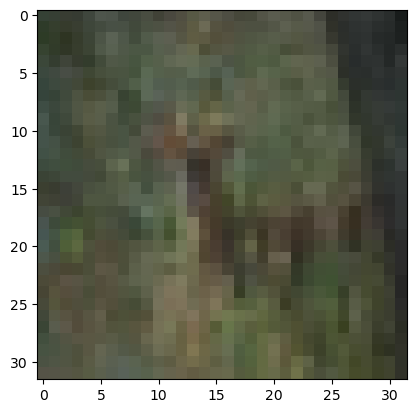

In [5]:
plt.imshow(x_train[10])

<h1>Limpieza de datos</h1>

In [6]:
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')


In [7]:
num_clases=len(np.unique(y_train))
print(num_clases)
y_train=to_categorical(y_train, num_clases)
y_test=to_categorical(y_test, num_clases)

10


In [8]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

<h1> Normalization </h1>

In [9]:
mean=np.mean(x_train)
std=np.std(x_train)

In [10]:
x_train=(x_train - mean)/(std*1e-7)
x_test=(x_test - mean)/(std*1e-7)

<h1>DATASET DIVISION</h1>

In [11]:
(x_train, x_valid) = x_train[5000:], x_train[:5000]
(y_train, y_valid) = y_train[5000:], y_train[:5000]

print('x_train shape', x_train.shape)

print('train', x_train.shape[0])
print('valid', x_valid.shape[0])
print('test', x_test.shape[0])

x_train shape (45000, 32, 32, 3)
train 45000
valid 5000
test 10000


<h1> CNN MODEL CREATION</h1>


In [12]:
base_filtros=32
w_regulatizer=1e-4

In [13]:
x_train.shape[1:]

(32, 32, 3)

In [14]:
model=Sequential()
## conv 1
model.add(Conv2D(base_filtros, (3,3), padding='same', kernel_regularizer=regularizers.l2(w_regulatizer), input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(BatchNormalization())

## conv 2
model.add(Conv2D(base_filtros, (3,3), padding='same', kernel_regularizer=regularizers.l2(w_regulatizer)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

## conv 3
model.add(Conv2D(2*base_filtros, (3,3), padding='same', kernel_regularizer=regularizers.l2(w_regulatizer)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

## conv 4
model.add(Conv2D(2*base_filtros, (3,3), padding='same', kernel_regularizer=regularizers.l2(w_regulatizer)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))

## conv 5
model.add(Conv2D(4*base_filtros, (3,3), padding='same', kernel_regularizer=regularizers.l2(w_regulatizer)))
model.add(Activation('relu'))
model.add(BatchNormalization())

## conv 6
model.add(Conv2D(4*base_filtros, (3,3), padding='same', kernel_regularizer=regularizers.l2(w_regulatizer)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

##Classification - Flateen

model.add(Flatten())
model.add(Dense(num_clases, activation='softmax'))

model.summary()


Model: "sequential"


_________________________________________________________________


 Layer (type)                Output Shape              Param #   


 conv2d (Conv2D)             (None, 32, 32, 32)        896       


 activation (Activation)     (None, 32, 32, 32)        0         


 batch_normalization (BatchN  (None, 32, 32, 32)       128       


 ormalization)                                                   


 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      


 activation_1 (Activation)   (None, 32, 32, 32)        0         


 batch_normalization_1 (Batc  (None, 32, 32, 32)       128       


 hNormalization)                                                 


 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         


 )                                                               


 dropout (Dropout)           (None, 16, 16, 32)        0         


 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     


 activation_2 (Activation)   (None, 16, 16, 64)        0         


 batch_normalization_2 (Batc  (None, 16, 16, 64)       256       


 hNormalization)                                                 


 dropout_1 (Dropout)         (None, 16, 16, 64)        0         


 conv2d_3 (Conv2D)           (None, 16, 16, 64)        36928     


 activation_3 (Activation)   (None, 16, 16, 64)        0         


 batch_normalization_3 (Batc  (None, 16, 16, 64)       256       


 hNormalization)                                                 


 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         


 2D)                                                             


 dropout_2 (Dropout)         (None, 8, 8, 64)          0         


 conv2d_4 (Conv2D)           (None, 8, 8, 128)         73856     


 activation_4 (Activation)   (None, 8, 8, 128)         0         


 batch_normalization_4 (Batc  (None, 8, 8, 128)        512       


 hNormalization)                                                 


 conv2d_5 (Conv2D)           (None, 8, 8, 128)         147584    


 activation_5 (Activation)   (None, 8, 8, 128)         0         


 batch_normalization_5 (Batc  (None, 8, 8, 128)        512       


 hNormalization)                                                 


 max_pooling2d_2 (MaxPooling  (None, 4, 4, 128)        0         


 2D)                                                             


 dropout_3 (Dropout)         (None, 4, 4, 128)         0         


 flatten (Flatten)           (None, 2048)              0         


 dense (Dense)               (None, 10)                20490     


Total params: 309,290


Trainable params: 308,394


Non-trainable params: 896


_________________________________________________________________


In [15]:
datagen = ImageDataGenerator(rotation_range=15, 
                   width_shift_range=0.1, 
                   height_shift_range=0.1, 
                   horizontal_flip=True, 
                   vertical_flip=True )

<h1> Compilation </h1>

In [16]:
from tensorflow.keras import optimizers

In [17]:
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(), 
              metrics=['accuracy'],
             )

In [18]:
#hist=model.fit(x_train, y_train, batch_size=32, epochs=100, 
#               validation_data=(x_valid, y_valid), 
#               verbose=2, shuffle=True)

In [19]:
checkpoint = ModelCheckpoint('best_model.hdf5', 
                             verbose=1, 
                             save_best_only=True,
                             monitor='val_accuracy')

In [20]:
hist=model.fit(datagen.flow(x_train, y_train, batch_size=128),
         callbacks=[checkpoint],
         steps_per_epoch=x_train.shape[0] // 128,
         epochs=120,
         verbose=2,
         validation_data=(x_valid, y_valid))

Epoch 1/120


2023-06-07 15:58:11.431202: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer



Epoch 1: val_accuracy improved from -inf to 0.41300, saving model to best_model.hdf5


351/351 - 42s - loss: 2.2166 - accuracy: 0.3246 - val_loss: 1.6381 - val_accuracy: 0.4130 - 42s/epoch - 119ms/step


Epoch 2/120



Epoch 2: val_accuracy improved from 0.41300 to 0.47980, saving model to best_model.hdf5


351/351 - 27s - loss: 1.6968 - accuracy: 0.4287 - val_loss: 1.5539 - val_accuracy: 0.4798 - 27s/epoch - 76ms/step


Epoch 3/120



Epoch 3: val_accuracy improved from 0.47980 to 0.50320, saving model to best_model.hdf5


351/351 - 27s - loss: 1.5138 - accuracy: 0.4872 - val_loss: 1.5564 - val_accuracy: 0.5032 - 27s/epoch - 77ms/step


Epoch 4/120



Epoch 4: val_accuracy improved from 0.50320 to 0.56440, saving model to best_model.hdf5


351/351 - 27s - loss: 1.3713 - accuracy: 0.5377 - val_loss: 1.3705 - val_accuracy: 0.5644 - 27s/epoch - 77ms/step


Epoch 5/120



Epoch 5: val_accuracy improved from 0.56440 to 0.59520, saving model to best_model.hdf5


351/351 - 27s - loss: 1.2630 - accuracy: 0.5741 - val_loss: 1.2291 - val_accuracy: 0.5952 - 27s/epoch - 77ms/step


Epoch 6/120



Epoch 6: val_accuracy improved from 0.59520 to 0.60720, saving model to best_model.hdf5


351/351 - 27s - loss: 1.1878 - accuracy: 0.5987 - val_loss: 1.2943 - val_accuracy: 0.6072 - 27s/epoch - 77ms/step


Epoch 7/120



Epoch 7: val_accuracy improved from 0.60720 to 0.62680, saving model to best_model.hdf5


351/351 - 27s - loss: 1.1272 - accuracy: 0.6184 - val_loss: 1.1742 - val_accuracy: 0.6268 - 27s/epoch - 76ms/step


Epoch 8/120



Epoch 8: val_accuracy improved from 0.62680 to 0.66000, saving model to best_model.hdf5


351/351 - 27s - loss: 1.0799 - accuracy: 0.6377 - val_loss: 1.0536 - val_accuracy: 0.6600 - 27s/epoch - 77ms/step


Epoch 9/120



Epoch 9: val_accuracy improved from 0.66000 to 0.66820, saving model to best_model.hdf5


351/351 - 27s - loss: 1.0457 - accuracy: 0.6485 - val_loss: 1.0304 - val_accuracy: 0.6682 - 27s/epoch - 77ms/step


Epoch 10/120



Epoch 10: val_accuracy improved from 0.66820 to 0.67940, saving model to best_model.hdf5


351/351 - 27s - loss: 1.0200 - accuracy: 0.6603 - val_loss: 1.0241 - val_accuracy: 0.6794 - 27s/epoch - 76ms/step


Epoch 11/120



Epoch 11: val_accuracy improved from 0.67940 to 0.69500, saving model to best_model.hdf5


351/351 - 27s - loss: 0.9891 - accuracy: 0.6720 - val_loss: 0.9587 - val_accuracy: 0.6950 - 27s/epoch - 76ms/step


Epoch 12/120



Epoch 12: val_accuracy did not improve from 0.69500


351/351 - 27s - loss: 0.9641 - accuracy: 0.6836 - val_loss: 1.0775 - val_accuracy: 0.6756 - 27s/epoch - 76ms/step


Epoch 13/120



Epoch 13: val_accuracy improved from 0.69500 to 0.72360, saving model to best_model.hdf5


In [ ]:
plt.plot(hist.history['accuracy'],label='Train')
plt.plot(hist.history['val_accuracy'],label='Val')
plt.legend()
plt.show()

In [ ]:
model2=model
model2.load_weights('/kaggle/working/best_model.hdf5')

In [ ]:
model2.evaluate(x_test, y_test)